<a href="https://colab.research.google.com/github/MILLERASPRILLA/Proyecto--Churn-/blob/main/Modelos/RandomForest_Tesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Universidad Central](https://www.ucentral.edu.co/sites/default/files/inline-images/identificadores-Centrados_en_ti_logo-h.png)

# __PROYECTO DE GRADO__

> ## ____ Implementación de modelos de aprendizaje de máquina para la prevención de la fuga de clientes en una empresa de telecomunicaciones.
>
>
> <br>
>
> ## __Contenido__

>**Tema:**

>> Random Forest

> Toma un subconjunto de variables y ajusta arboles con algún parámetro de parada, generalmente 5 por hoja. En este no se hace podado. La documentación [acá](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)

> Otra [info](https://www.cienciadedatos.net/documentos/py08_random_forest_python.html) importante 


>---

- Librerias

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model, tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.metrics import class_likelihood_ratios
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import cross_val_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier 

# EXTRACCIÓN DE LOS DATOS 

In [ ]:
DF = pd.read_csv("https://raw.githubusercontent.com/MILLERASPRILLA/Proyecto--Churn-/main/Bases/Data_limpia%20(2).csv", sep= ",", encoding= "latin1")
DF.shape

(7043, 20)

In [ ]:
DF.set_index("ID_CLIENTE", inplace = True)
DF.head()

,GENERO,ADULTO_MAYOR,CASADO,PERSONAS_A_CARGO,MESES_COMO_CLIENTE,TIENE_TELEFONIA,VARIAS_LINEAS,TIPO_INTERNET,SEGURIDAD_EN_LINEA,COPIA_DE_SEGURIDAD,PROTECCION_DISPOSITIVO,SOPORTE_TECNICO,SERVICIO_TV,SERVICIOS_STREAMING,PERIODO_CONTRATO,FACTURACION_ELECTRONICA,METODO_PAGO,COBRO_MENSUAL,ABANDONO
ID_CLIENTE,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes


# PREPROCESAMIENTO

## EXPLORACIÓN

In [ ]:
# Exploracion de las variables. 
DF.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   GENERO                   7043 non-null   object 
 1   ADULTO_MAYOR             7043 non-null   int64  
 2   CASADO                   7043 non-null   object 
 3   PERSONAS_A_CARGO         7043 non-null   object 
 4   MESES_COMO_CLIENTE       7043 non-null   int64  
 5   TIENE_TELEFONIA          7043 non-null   object 
 6   VARIAS_LINEAS            7043 non-null   object 
 7   TIPO_INTERNET            7043 non-null   object 
 8   SEGURIDAD_EN_LINEA       7043 non-null   object 
 9   COPIA_DE_SEGURIDAD       7043 non-null   object 
 10  PROTECCION_DISPOSITIVO   7043 non-null   object 
 11  SOPORTE_TECNICO          7043 non-null   object 
 12  SERVICIO_TV              7043 non-null   object 
 13  SERVICIOS_STREAMING      7043 non-null   object 
 14  PERIODO_CONTRA

>> A pesar que en la limpieza de datos habíamos transformado las variables tipo objeto a tipo category, al cargar la base de datos Python las reconoce como objeto, por lo cual, reemplazaremos nuevamente el tipo de dato. 

In [ ]:
# Convertir columnas en categorias
columnasConvertir = ['GENERO', 'ADULTO_MAYOR', 'CASADO', 'PERSONAS_A_CARGO', 'TIENE_TELEFONIA', 
               'VARIAS_LINEAS', 'TIPO_INTERNET', 'SEGURIDAD_EN_LINEA', 'COPIA_DE_SEGURIDAD', 
               'PROTECCION_DISPOSITIVO', 'SOPORTE_TECNICO', 'SERVICIO_TV', 'SERVICIOS_STREAMING', 
               'PERIODO_CONTRATO', 'FACTURACION_ELECTRONICA', 'METODO_PAGO', 'ABANDONO']
              
DF[columnasConvertir] = DF[columnasConvertir].astype("category")

In [ ]:
# Reporte de cambios
DF.dtypes

GENERO                     category
ADULTO_MAYOR               category
CASADO                     category
PERSONAS_A_CARGO           category
MESES_COMO_CLIENTE            int64
TIENE_TELEFONIA            category
VARIAS_LINEAS              category
TIPO_INTERNET              category
SEGURIDAD_EN_LINEA         category
COPIA_DE_SEGURIDAD         category
PROTECCION_DISPOSITIVO     category
SOPORTE_TECNICO            category
SERVICIO_TV                category
SERVICIOS_STREAMING        category
PERIODO_CONTRATO           category
FACTURACION_ELECTRONICA    category
METODO_PAGO                category
COBRO_MENSUAL               float64
ABANDONO                   category
dtype: object

## ONE CODE

>> Toda vez que el modelo no recibe datos categóricos , codificaremos las variables categoricas en variables tipo one code

In [ ]:
# Codificacion variables categoricas
DF_dummie = DF.select_dtypes(exclude=np.number)
DF_dummie = pd.get_dummies(DF_dummie, drop_first = True)
DF_dummie.head()

,GENERO_Male,ADULTO_MAYOR_1,CASADO_Yes,PERSONAS_A_CARGO_Yes,TIENE_TELEFONIA_Yes,VARIAS_LINEAS_No phone service,VARIAS_LINEAS_Yes,TIPO_INTERNET_Fiber optic,TIPO_INTERNET_No,SEGURIDAD_EN_LINEA_No internet service,...,SERVICIO_TV_Yes,SERVICIOS_STREAMING_No internet service,SERVICIOS_STREAMING_Yes,PERIODO_CONTRATO_One year,PERIODO_CONTRATO_Two year,FACTURACION_ELECTRONICA_Yes,METODO_PAGO_Credit card (automatic),METODO_PAGO_Electronic check,METODO_PAGO_Mailed check,ABANDONO_Yes
ID_CLIENTE,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
5575-GNVDE,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3668-QPYBK,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
7795-CFOCW,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9237-HQITU,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


## Escalamiento de datos

>> Toda vez que los datos cuantitativos en la base tienen escalas y unidades de medida diferentes consideramos necesario homogenizar estos datos para evitar introducir sesgos al modelo. 

>> Para esto homogenizaremos las variables usando la técnica de Robust Scaler que nos permitirá no solo ajustar nuestros datos a una distribución normal, si no que nos evitara que los datos atípicos sesguen los resultados de nuestro modelo.  

> Escala características utilizando estadísticas que son robustas a los valores atípicos. 
Este Escalador elimina la mediana y escala los datos según el rango cuantílico (por defecto IQR: Interquartile Range). El IQR es el rango entre el 1er cuartil (cuantil 25) y el 3er cuartil (cuantil 75). 
El centrado y el escalado se realizan de forma independiente en cada característica calculando los estadísticos relevantes en las muestras del conjunto de entrenamiento. A continuación, la mediana y el rango intercuartílico se almacenan para utilizarlos en datos posteriores mediante el método de transformación. 
La normalización de un conjunto de datos es un requisito común para muchos estimadores de aprendizaje automático. Normalmente, esto se hace eliminando la media y escalando a la varianza unitaria. Sin embargo, los valores atípicos pueden influir negativamente en la media/varianza de la muestra. En estos casos, la mediana y el rango intercuartílico suelen dar mejores resultados. 
[Info](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)

In [ ]:
# Obtener variables numericas en otro data frame
DF_num = DF.select_dtypes(include=np.number)
# Estandarizar los datos numericos
datosEstandarizados = preprocessing.RobustScaler().fit_transform(DF_num)
# Crear dataframa con los datos estandarizados 
DF_num = pd.DataFrame(datosEstandarizados, columns = DF_num.columns, index = DF_num.index)
DF_num.head()

,MESES_COMO_CLIENTE,COBRO_MENSUAL
ID_CLIENTE,,
7590-VHVEG,-0.608696,-0.745170
5575-GNVDE,0.108696,-0.246550
3668-QPYBK,-0.586957,-0.303588
7795-CFOCW,0.347826,-0.516099
9237-HQITU,-0.586957,0.006440


## BASE FINAL

In [ ]:
# concatenar los dataframe
DF_modelo =  pd.concat([DF_dummie, DF_num], axis=1)
DF_modelo.head() 

,GENERO_Male,ADULTO_MAYOR_1,CASADO_Yes,PERSONAS_A_CARGO_Yes,TIENE_TELEFONIA_Yes,VARIAS_LINEAS_No phone service,VARIAS_LINEAS_Yes,TIPO_INTERNET_Fiber optic,TIPO_INTERNET_No,SEGURIDAD_EN_LINEA_No internet service,...,SERVICIOS_STREAMING_Yes,PERIODO_CONTRATO_One year,PERIODO_CONTRATO_Two year,FACTURACION_ELECTRONICA_Yes,METODO_PAGO_Credit card (automatic),METODO_PAGO_Electronic check,METODO_PAGO_Mailed check,ABANDONO_Yes,MESES_COMO_CLIENTE,COBRO_MENSUAL
ID_CLIENTE,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,-0.608696,-0.745170
5575-GNVDE,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0.108696,-0.246550
3668-QPYBK,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,1,-0.586957,-0.303588
7795-CFOCW,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0.347826,-0.516099
9237-HQITU,0,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,1,0,1,-0.586957,0.006440


In [ ]:
DF_modelo.to_csv("Data_dummie.csv")

# MODELADO

## MODELO 1

In [ ]:
# Partición de datos de entrenamiento y prueba 
Y=DF_modelo["ABANDONO_Yes"] ## Seleccionamos la variable objetivo (binaria)
X=DF_modelo.drop("ABANDONO_Yes", axis=1) ## Seleccionamos las variables explicativas
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=123,test_size=0.3, stratify=Y) ## Dividimos en entrenamiento y prueba, y estratificando
##por la variable Y 
X_train.shape

(4930, 29)

In [ ]:
#   Entrenando al modelo
RF= RandomForestClassifier(min_samples_leaf=1, n_estimators=100)### Deje 5 datos por nodo terminal
RF.fit(X_train, y_train)

RandomForestClassifier()

### METRICAS MODELO  

In [ ]:
# prediccion del modelo 
y_pred_train=RF.predict(X_train) # Prediccion datos entrenamiento
y_pred_test=RF.predict(X_test) # Prediccion datos prueba

In [ ]:
cf = confusion_matrix(y_test, y_pred_test)

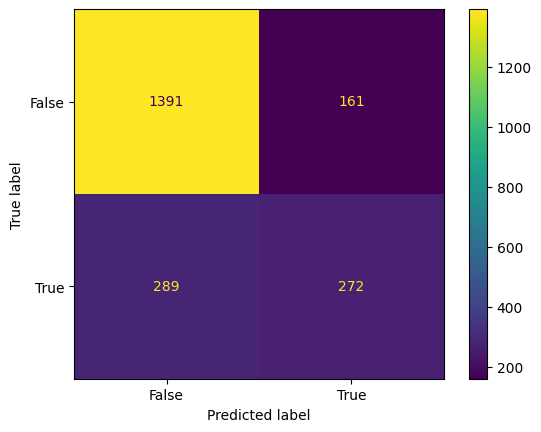

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cf, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
#  viendo sus metricas
print("En los datos de entrenamiento \n",classification_report(y_train, y_pred_train))
print("En los datos de prueba \n",classification_report(y_test, y_pred_test))

En los datos de entrenamiento 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3622
           1       1.00      0.99      1.00      1308

    accuracy                           1.00      4930
   macro avg       1.00      1.00      1.00      4930
weighted avg       1.00      1.00      1.00      4930

En los datos de prueba 
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1552
           1       0.63      0.48      0.55       561

    accuracy                           0.79      2113
   macro avg       0.73      0.69      0.70      2113
weighted avg       0.77      0.79      0.78      2113



>> Observamos que el modelo planteado clasifica bien el 80% de los datos en la prueba, sin embargo, tiene importantes dificultades para clasificar las personas que se irán de la compañía efectivamente, Como podemos observar de los 561 clientes fugados que tienen los datos de prueba solo acertó en 296.

>> la precisión del modelo muestra que solo el 65% de las personas que el modelo indico se irían de la compañía se fueron efectivamente. Por su parte, tan solo el 53% de las personas que el modelo sugiere no se irían de la compaña efectivamente se quedaron. 

>>Cabe recordar que el objetivo de este trabajo es predecir correctamente los clientes que se fugen, por lo que el RCALL nos sugiere que el modelo esta siendo poco efectivo en este sentido. 


### AREA BAJO LA CURVA ROC

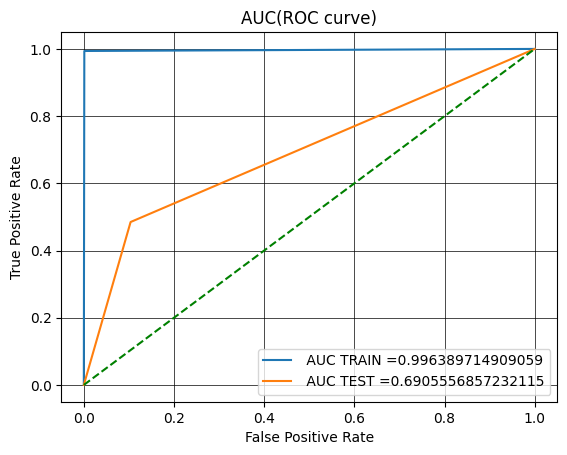

In [ ]:
train_fpr, train_tpr, tr_thresholds = roc_curve( y_train, y_pred_train)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_pred_test)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

## MODELO 2 -> HIPERPARAMETROS 

### AJUSTE DE HIPERPARAMETROS 

>> Informacion de gridsearchCV [acá](https://www.kaggle.com/code/sociopath00/random-forest-using-gridsearchcv)

In [ ]:
# parametros a evaluar 
param_grid = { 
    'n_estimators': [50, 100, 200, 500],
    'max_features': ['sqrt', 'log2', 'none'],
    'max_depth' : [5,6,7,8,9,10],
    'criterion' :['gini', 'entropy']
}

In [ ]:
# asignacion de parametros a la grid
rfc=RandomForestClassifier(random_state=42)
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

In [ ]:
# Mejores parametros
mejoresParametros = CV_rfc.best_params_
mejoresParametros

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'sqrt',
 'n_estimators': 200}

### MODELO  

In [ ]:
# Modelo con hiperparametros arrojados por la busquedad en grilla
rfc1=RandomForestClassifier(random_state=42, 
                            max_features = mejoresParametros['max_features'], 
                            n_estimators = mejoresParametros['n_estimators'], 
                            max_depth = mejoresParametros['max_depth'], 
                            criterion = mejoresParametros['criterion'])
rfc1.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=7, max_features='auto', n_estimators=200,
                       random_state=42)

### METRICAS MODELO 

In [ ]:
# prediccion del modelo 
y_pred_train=rfc1.predict(X_train) # Prediccion datos entrenamiento
y_pred_test=rfc1.predict(X_test) # Prediccion datos prueba

In [ ]:
cf = confusion_matrix(y_test, y_pred_test)

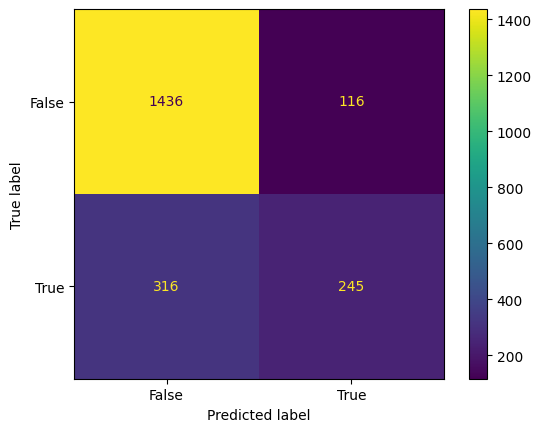

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cf, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
#  viendo sus metricas
print("En los datos de entrenamiento \n",classification_report(y_train, y_pred_train))
print("En los datos de prueba \n",classification_report(y_test, y_pred_test))

En los datos de entrenamiento 
               precision    recall  f1-score   support

           0       0.84      0.93      0.88      3622
           1       0.72      0.50      0.59      1308

    accuracy                           0.81      4930
   macro avg       0.78      0.71      0.73      4930
weighted avg       0.81      0.81      0.80      4930

En los datos de prueba 
               precision    recall  f1-score   support

           0       0.82      0.93      0.87      1552
           1       0.68      0.44      0.53       561

    accuracy                           0.80      2113
   macro avg       0.75      0.68      0.70      2113
weighted avg       0.78      0.80      0.78      2113



### AREA BAJO LA CURVA ROC

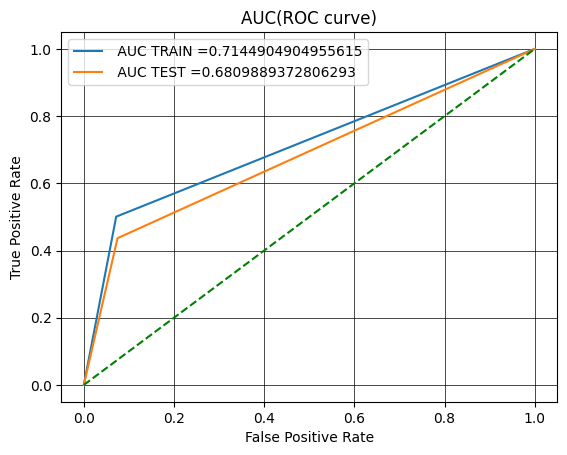

In [ ]:
train_fpr, train_tpr, tr_thresholds = roc_curve( y_train, y_pred_train)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_pred_test)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

## MODELO 3 -> BALANCEO DE DATOS 

### BALANCEO DE DATOS

In [ ]:
# asignacion de parametros a la grid
rfc=RandomForestClassifier(random_state=42, class_weight = {0 : 1, 1 : 2})
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

In [ ]:
# Mejores parametros
mejoresParametros = CV_rfc.best_params_
mejoresParametros

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [ ]:
# Modelo con hiperparametros arrojados por la busquedad en grilla
rfc1=RandomForestClassifier(random_state=42, class_weight = {0 : 1, 1 : 2}, 
                            max_features = mejoresParametros['max_features'], 
                            n_estimators = mejoresParametros['n_estimators'], 
                            max_depth = mejoresParametros['max_depth'], 
                            criterion = mejoresParametros['criterion'])
# Entrenando al modelo
rfc1.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(class_weight={0: 1, 1: 2}, max_depth=10,
                       max_features='auto', n_estimators=500, random_state=42)

### METRICAS DEL MODELO

In [ ]:
# prediccion del modelo 
y_pred_train=rfc1.predict(X_train) # Prediccion datos entrenamiento
y_pred_test=rfc1.predict(X_test) # Prediccion datos prueba

In [ ]:
cf2 = confusion_matrix(y_test, y_pred_test)

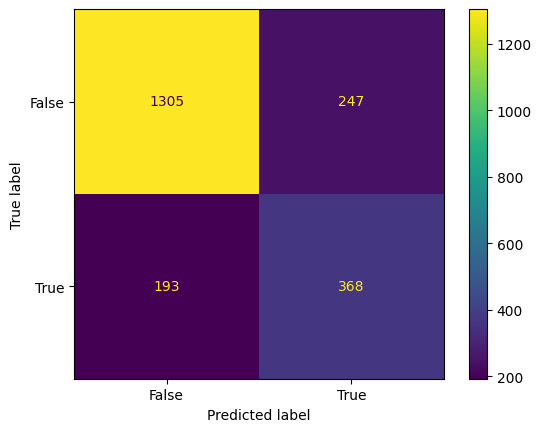

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cf2, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
#  viendo sus metricas
print("En los datos de entrenamiento \n",classification_report(y_train, y_pred_train))
print("En los datos de prueba \n",classification_report(y_test, y_pred_test))

En los datos de entrenamiento 
               precision    recall  f1-score   support

           0       0.94      0.87      0.91      3622
           1       0.70      0.86      0.77      1308

    accuracy                           0.87      4930
   macro avg       0.82      0.86      0.84      4930
weighted avg       0.88      0.87      0.87      4930

En los datos de prueba 
               precision    recall  f1-score   support

           0       0.87      0.84      0.86      1552
           1       0.60      0.66      0.63       561

    accuracy                           0.79      2113
   macro avg       0.73      0.75      0.74      2113
weighted avg       0.80      0.79      0.79      2113



>> El modelo balanceado muestra una tasa de falsos positivos más baja que el modelo anterior, sin embargo la precisión de los clientes churn sigue teniendo una porcentaje bajo de 0,57% lo que significa que el modelo sigue clasificando como fugados una cantidad importante de clientes que no consideran fugarse de la compañía. 

>> El modelo sigue clasificando mejor a los no fugados que a los fugados, el f1- score para esta categoría es de 0,84 % mientras que para los fugados es de 0,63% 

### AREA BAJO LA CURVA ROC

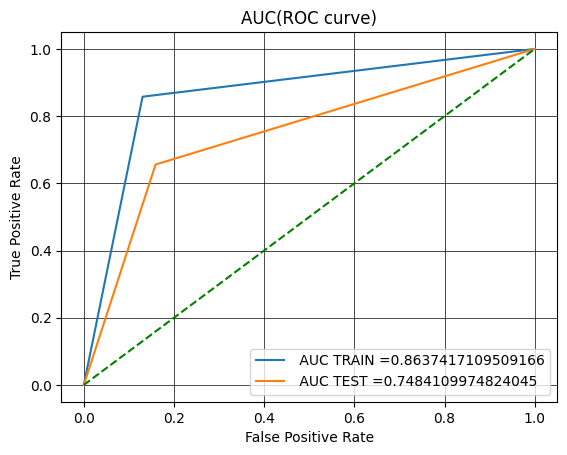

In [ ]:
train_fpr, train_tpr, tr_thresholds = roc_curve( y_train, y_pred_train)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_pred_test)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

## MODELO 4 -> UNDERSAMPLING 

In [ ]:
# Partición de datos de entrenamiento y prueba 
Y=DF_modelo["ABANDONO_Yes"] ## Seleccionamos la variable objetivo (binaria)
X=DF_modelo.drop("ABANDONO_Yes", axis=1) ## Seleccionamos las variables explicativas
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=123,test_size=0.3, stratify=Y) ## Dividimos en entrenamiento y prueba, y estratificando
##por la variable Y 
X_train.shape

(4930, 29)

In [ ]:
# Undersampling en los datos de entrenamiento
rus = RandomUnderSampler(random_state=42)
X_resampled, Y_resampled = rus.fit_resample(X_train, y_train)
X_resampled.shape

(2616, 29)

### MODELO  

In [ ]:
# asignacion de parametros a la grid
rfc=RandomForestClassifier(random_state=42)
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

In [ ]:
# Mejores parametros
mejoresParametros = CV_rfc.best_params_
mejoresParametros

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [ ]:
# Modelo con hiperparametros arrojados por la busquedad en grilla
rfc1=RandomForestClassifier(random_state=42, 
                            max_features = mejoresParametros['max_features'], 
                            n_estimators = mejoresParametros['n_estimators'], 
                            max_depth = mejoresParametros['max_depth'], 
                            criterion = mejoresParametros['criterion'])
rfc1.fit(X_resampled, Y_resampled)

RandomForestClassifier(max_depth=7, n_estimators=200, random_state=42)

### METRICAS DEL MODELO 

In [ ]:
y_pred_train=rfc1.predict(X_resampled) ### Un umbral de 50%
y_pred_test=rfc1.predict(X_test) ##  Un umbral de 50%

In [ ]:
cm12 = confusion_matrix(y_test, y_pred_test)

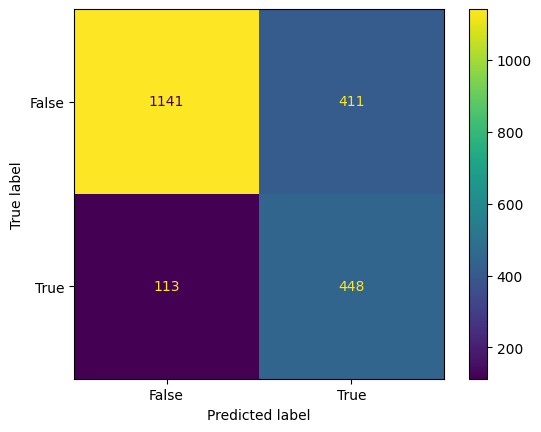

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm12, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
print("En los datos de entrenamiento \n",classification_report(Y_resampled, y_pred_train))
print("En los datos de prueba \n",classification_report(y_test, y_pred_test))

En los datos de entrenamiento 
               precision    recall  f1-score   support

           0       0.84      0.77      0.80      1308
           1       0.79      0.85      0.82      1308

    accuracy                           0.81      2616
   macro avg       0.81      0.81      0.81      2616
weighted avg       0.81      0.81      0.81      2616

En los datos de prueba 
               precision    recall  f1-score   support

           0       0.91      0.74      0.81      1552
           1       0.52      0.80      0.63       561

    accuracy                           0.75      2113
   macro avg       0.72      0.77      0.72      2113
weighted avg       0.81      0.75      0.76      2113



>> Como observamos en las métricas de precisión existe un sobre ajuste en del modelo en los datos de entrenamiento respecto a los de prueba, sin embargo, observamos que el modelo es de los probados hasta el momento el que mejor predice los clientes churn, de los 561 clientes churn que hay en los datos de prueba clasifica correctamente 444. 

>> La precisión para los clientes no churn es 0,12 mejor en los datos de prueba que en los de entrenamiento lo cual es positivo, sin embargo la precisión para los churn es un 0,23 más baja. 

### AREA BAJO LA CURVA ROC 

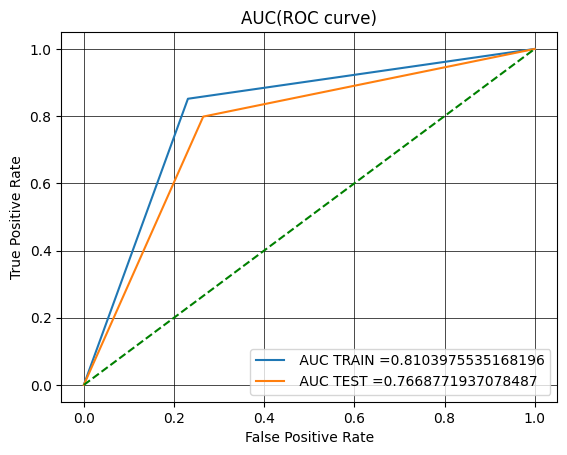

In [ ]:
train_fpr, train_tpr, tr_thresholds = roc_curve( Y_resampled, y_pred_train)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_pred_test)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

## MODELO 5 -> UNDERSAMPLING Y BALANCEO 

In [ ]:
# Partición de datos de entrenamiento y prueba 
Y=DF_modelo["ABANDONO_Yes"] ## Seleccionamos la variable objetivo (binaria)
X=DF_modelo.drop("ABANDONO_Yes", axis=1) ## Seleccionamos las variables explicativas
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=123,test_size=0.3, stratify=Y) ## Dividimos en entrenamiento y prueba, y estratificando
##por la variable Y 
X_train.shape

(4930, 29)

In [ ]:
# Undersampling en los datos de entrenamiento
rus = RandomUnderSampler(random_state=42)
X_resampled, Y_resampled = rus.fit_resample(X_train,y_train)
X_resampled.shape

(2616, 29)

### MODELO  

In [ ]:
# asignacion de parametros a la grid
rfc=RandomForestClassifier(random_state=42, class_weight = {0 : 1, 1 : 2})
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
240 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.9/dist-packages/sklearn/utils/_

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight={0: 1, 1: 2},
                                              random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9, 10],
                         'max_features': ['sqrt', 'log2', 'none'],
                         'n_estimators': [50, 100, 200, 500]})

In [ ]:
# Mejores parametros
mejoresParametros = CV_rfc.best_params_
mejoresParametros

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'n_estimators': 500}

In [ ]:
# Modelo con hiperparametros arrojados por la busquedad en grilla
rfc1=RandomForestClassifier(random_state=42, class_weight = {0 : 1, 1 : 2}, 
                            max_features = mejoresParametros['max_features'], 
                            n_estimators = mejoresParametros['n_estimators'], 
                            max_depth = mejoresParametros['max_depth'], 
                            criterion = mejoresParametros['criterion'])
rfc1.fit(X_resampled, Y_resampled)

RandomForestClassifier(class_weight={0: 1, 1: 2}, max_depth=10,
                       n_estimators=500, random_state=42)

### METRICAS DEL MODELO 

In [ ]:
y_pred_train=rfc1.predict(X_resampled) ### Un umbral de 50%
y_pred_test=rfc1.predict(X_test) ##  Un umbral de 50%

In [ ]:
cm13 = confusion_matrix(y_test, y_pred_test)

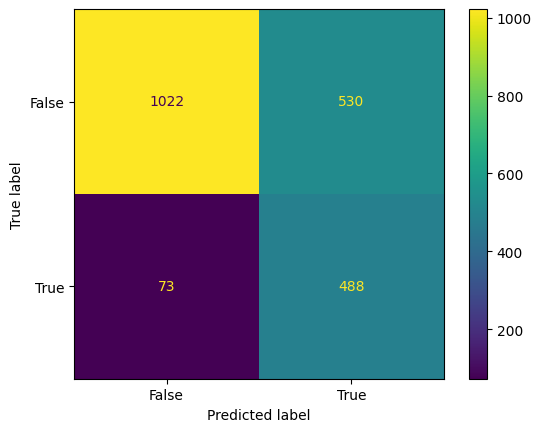

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm13, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
print("En los datos de entrenamiento \n",classification_report(Y_resampled, y_pred_train))
print("En los datos de prueba \n",classification_report(y_test, y_pred_test))

En los datos de entrenamiento 
               precision    recall  f1-score   support

           0       0.99      0.76      0.86      1308
           1       0.81      1.00      0.89      1308

    accuracy                           0.88      2616
   macro avg       0.90      0.88      0.88      2616
weighted avg       0.90      0.88      0.88      2616

En los datos de prueba 
               precision    recall  f1-score   support

           0       0.93      0.66      0.77      1552
           1       0.48      0.87      0.62       561

    accuracy                           0.71      2113
   macro avg       0.71      0.76      0.70      2113
weighted avg       0.81      0.71      0.73      2113



### AREA BAJO LA CURVA ROC 

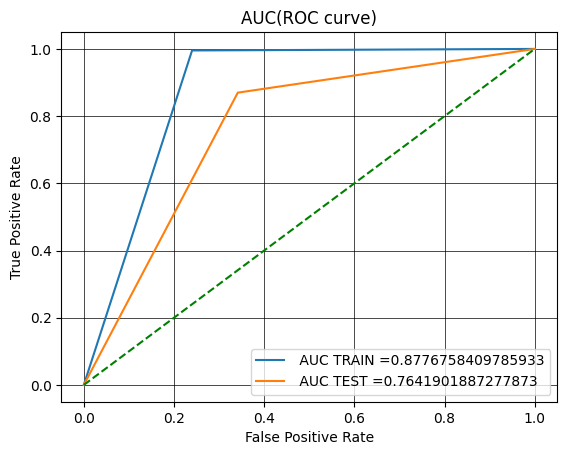

In [ ]:
train_fpr, train_tpr, tr_thresholds = roc_curve( Y_resampled, y_pred_train)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_pred_test)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()